# Quantum Bomb and the watched pot effect

- QPU time: 1 min
- Difficulty level: Intermediate
- Number of exercises: 4

## Background

The principles of quantum mechanics offer profound, often counter-intuitive, ways to process information. Two foundational examples are the Elitzur-Vaidman bomb tester, which demonstrates interaction-free measurement, and the Quantum Zeno effect, known as the "watched pot" effect. While distinct, both concepts reveal how quantum properties like superposition, interference, and measurement are not just theoretical curiosities but essential tools that are shaping modern quantum technologies.


In 1993, Avshalom Elitzur and Lev Vaidman proposed a remarkable thought experiment that challenged classical intuition [1]. Their "bomb tester" introduced the concept of interaction-free measurement by posing a question: How can you detect the presence of an object without a single particle ever physically interacting with it?


Similarly, the Quantum Zeno effect provides a physical basis for the proverb "a watched pot never boils." This effect, first theorized by Misra and Sudarshan in 1977 and experimentally confirmed in 1990 by a team led by David J. Wineland, shows that frequently observing a quantum system can effectively halt its evolution [2, 3].

References
- [1] Elitzur, A. C., & Vaidman, L. (1993). Quantum mechanical interaction-free measurements. Foundations of Physics, 23(7), 987–997.
- [2] Misra, B., & Sudarshan, E. C. G. (1977). The Zeno’s paradox in quantum theory. Journal of Mathematical Physics, 18(4), 756–763.
- [3] Itano, W. M., Heinzen, D. J., Bollinger, J. J., & Wineland, D. J. (1990). Quantum Zeno effect. Physical Review A, 41(5), 2295–2300.

## Requirements

Before starting this tutorial, be sure you have the following installed:
- The latest Qiskit SDK with visualization support ( `pip install -U 'qiskit[visualization]'` )
- The latest Qiskit Runtime (`pip install -U qiskit-ibm-runtime`)

By un-commenting (removing the `#`) and running the below cell, you can install/update `qiskit` and `qiskit-ibm-runtime`

In [ ]:
# %pip install -U 'qiskit[visualization]' qiskit-ibm-runtime

In [ ]:
import numpy as np

import matplotlib.pyplot as plt
from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

from qiskit.circuit import Parameter

from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
from qiskit.visualization import plot_histogram
from qiskit.quantum_info import Statevector

from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit.visualization import plot_distribution


## 1. The Elitzur-Vaidman Quantum Bomb Tester

[This thought experiment](https://en.wikipedia.org/wiki/Elitzur%E2%80%93Vaidman_bomb_tester) uses a Mach-Zehnder interferometer and a hypothetical light-sensitive bomb. A Mach-Zehnder interferometer is an optical device that splits a single beam of light (or even a single photon) into two separate paths and then recombines them. When the paths are recombined, the light waves interfere with each other, but this interference will be destroyed if we place an object in one arm that interacts with the photon. With this setup, the central question is: How can we ascertain the presence of the bomb in one of the interferometer's paths without the photon ever "touching" it and causing it to blow up?

The key quantum principles that this experiment are:

Wave-Particle Duality & Superposition: A quantum particle exhibits both wave and particle properties and can exist in a superposition of multiple possible states (e.g., multiple paths) at the same time. In a Mach-Zehnder interferometer, a single photon passes through the first beam splitter and enters a superposition of being on two different paths at the same time.

Interference: Like waves, superposed states can interfere with each other. In the absence of a bomb, the photon, having traversed both paths, recombines at a second beam splitter, leading to constructive and destructive interference. 

Measurement and Collapse of a Quantum State: If a bomb (a target) is placed on one of the paths, its presence works as an act of "measuring" the path of the photon -- whether or not the bomb explodes tells us which path the photon took. This measurement collapses the photon's superposition, thereby destroying the interference pattern. This makes it possible for the photon to be detected at a detector it could never have reached in the bomb's absence, allowing us to indirectly infer the bomb's presence.


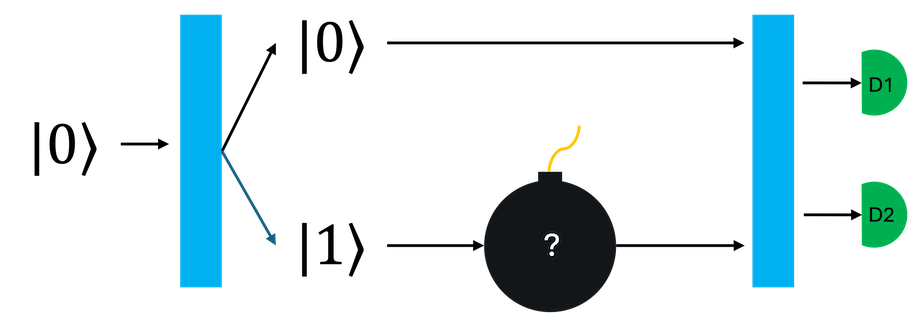


### Case 1: No Bomb

Without a bomb, the setup is a standard Mach-Zehnder interferometer. A single photon (represented as a qubit) undergoes the following process:

1.   Initialize ($|\psi_0\rangle$) : The photon starts in the state $|0\rangle$.
    
$$|\psi_0\rangle = |0\rangle$$

2.  First Beam Splitter ($|\psi_1\rangle$): The photon passes through the first beam splitter, which puts it into a superposition of taking both the upper path (represented by $|0\rangle$) and the lower path (represented by $|1\rangle$) simultaneously, by applying a Hadamard gate to the qubit.
    $$|\psi_1\rangle = H|\psi_0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

3.  Second Beam Splitter ($|\psi_2\rangle$): After traversing both paths, the photon state recombines at the second beam splitter, again by applying a Hadamard gate. The two paths interfere with each other. The final state is:
    $$|\psi_2\rangle = H|\psi_1\rangle = H\left(\frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)\right) = \frac{1}{\sqrt{2}}(H|0\rangle + H|1\rangle)$$
    $$= \frac{1}{\sqrt{2}}\left(\frac{|0\rangle+|1\rangle}{\sqrt{2}} + \frac{|0\rangle-|1\rangle}{\sqrt{2}}\right) = \frac{1}{2}(|0\rangle+|1\rangle+|0\rangle-|1\rangle) = |0\rangle$$

4.  Measurement: Due to constructive interference for the $|0\rangle$ state and destructive interference for the $|1\rangle$ state, the photon is always found at Detector 1 (outcome `0`, $P(0)$). Detector 2 (outcome `1`, $P(1)$) never clicks. The probability of measuring `1` is zero, if there is no bomb.
    $$P(0) = |\langle0|\psi_2\rangle|^2 = 1$$
    $$P(1) = |\langle1|\psi_2\rangle|^2 = 0$$

<div class="alert alert-block alert-success">
<b>Exercise 1: Build a quantum circuit for the "No Bomb" Case</b>


**Your Goal** Your goal is to complete the Qiskit code below to build a quantum circuit that simulates the "No Bomb" scenario. When you run the completed circuit, you should observe that the photon is always detected at Detector 1 (state $|0\rangle$), never at Detector 2 (state $|1\rangle$).

To complete, based on the explanation, complete the circuit below using the [Hadamard gate](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.HGate).

</div>

In [ ]:
qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='measure')

circuit = QuantumCircuit(qr, cr)


# Quantum circuit for bomb absent

#first bomb splitter
# Your Code Here#

# second beam splitter
# Your Code Here #

#measure
circuit.measure(qr,cr)

Check your circuit by drawing.

In [ ]:
circuit.draw('mpl')

Let's check the measurement results of this circuit. If you want to run it on a real quantum backend, uncomment the following cell and execute it instead of `backend = AerSimulator()`. Please refer to Lab 0 for instructions on how to set up the quantum backend.

To execute a quantum circuit on a quantum computer using Qiskit sometimes it is convenient just to select the machine that is least busy at the moment by using `least_busy`.

In [ ]:
#your_api_key = "deleteThisAndPasteYourAPIKeyHere"
#your_crn = "deleteThisAndPasteYourCRNHere"


#QiskitRuntimeService.save_account(
#    channel="ibm_cloud",
#    token=your_api_key,
#    instance=your_crn,
#    set_as_default=True,
#    overwrite=True,
#)

service = QiskitRuntimeService()
backend = service.least_busy(operational=True, simulator=False)

#backend = AerSimulator()

In [ ]:
pm = generate_preset_pass_manager(backend=backend, optimization_level=3)

qc_tr=pm.run(circuit)

sampler = Sampler(mode=backend)
job = sampler.run([qc_tr], shots = 1024)

job_id = job.job_id()

In [ ]:
#result = service.job(job_id).result()
result = job.result()
counts = result[0].data.measure.get_counts()
plot_distribution(counts)

As expected, all measurements resulted in '0', indicating no bomb, if you compose a circuit correctly. Now, let's see what happens if a bomb is present in the path.

### Case 2: Watch out! Bomb is there

Now, let's place the light-sensitive bomb on the lower path (corresponding to the $|1\rangle$ state). The bomb itself now acts as a measurement device. If the photon travels along this path, its presence will be measured by the bomb exploding. This act of measurement fundamentally changes the outcome by destroying the quantum superposition.

1.  First Beam Splitter ($|\psi_1\rangle$): Same as before, the photon enters a superposition.
    $$|\psi_1\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

2.  The Bomb's Measurement: The superpositioned beam now encounters the bomb on the $|1\rangle$ path. This forces the photon to "choose" a path, collapsing the wavefunction. There are two possibilities:

    * 50% chance of explosion: The photon is measured on the $|1\rangle$ path. The bomb detonates. The probability is $P(\text{explosion}) = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}$. 

    To mimic the effect of an explosion, a specific technique is used here. If the first measurement (simulating the bomb) yields a `1`, a conditional Hadamard gate is applied to the qubit. This gate is strategically placed before the final H gate that acts as the second beam splitter and cancels it out by making it the identity gate $HH = I$. 

    * 50% chance of no explosion: If the photon chose $|0\rangle$ path, the bomb does not detonate. The wavefunction collapses to the definite state $|0\rangle$. The probability is $P(\text{no explosion}) = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}$. The photon now continues to the second beam splitter in the state $|\psi_{\text{no explosion}}\rangle = |0\rangle$.

3-1.  Second Beam Splitter (if no explosion, $|\psi_2'\rangle$): The collapsed state $|0\rangle$ passes through the second beam splitter.
    $$|\psi_2'\rangle = H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$$

3-2.  Second Beam Splitter (if explosion, $|\psi_2'\rangle$): In this case, the conditional Hadamard is implemented right before the second beam splitter. 
    $$|\psi_2'\rangle = HH|1\rangle = I(|1\rangle) = |1\rangle$$

4-1.  Final Measurement (if no explosion) : This new superposition is measured at the detectors. The probabilities are now different:

- Detector 1 (outcome `0`, $P(0|\text{no explosion})$): $P(0|\text{no explosion}) = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}$.
- Detector 2 (outcome `1`, $P(1|\text{no explosion})$): $P(1|\text{no explosion}) = \left|\frac{1}{\sqrt{2}}\right|^2 = \frac{1}{2}$.

4-2.  Final Measurement (if explosion) : As the qubit state is fixed into $|1\rangle$ state at 3-2, measurement result remain same.

- Detector 1 (outcome `0`, $P(0|\text{explosion})$): $P(0|\text{explosion}) = 0$.
- Detector 2 (outcome `1`, $P(1|\text{explosion})$): $P(1|\text{explosion}) = 1$.


Combining all probabilities, we get three possible final outcomes for the entire experiment:

* `11`: Bomb Explodes.  50% chance.
* `00`: No Explosion. Detector 1 clicked. This requires the "no explosion" path (50%) AND the final measurement to be `0` (50%). Total probability = $50\% \times 50\% = \textbf{25\%}$.
* `10`: No Explosion. Detector 2 clicked. This requires the "no explosion" path (50%) AND the final measurement to be `1` (50%). Total probability = $50\% \times 50\% = \textbf{25\%}$.


<div class="alert alert-block alert-success">
<b>Exercise 2: Build a quantum circuit for the "with Bomb" Case</b>

**Your Goal**: Your objective is to construct a quantum circuit that models the "With Bomb" scenario. The bomb's presence on the lower path ($|1\rangle$) acts as a mid-circuit measurement. When you run the simulation, the results should align with the predicted probabilities, explained above.

To complete this exercise, you will need to use mid-circuit measurements and classically controlled operations. First, create a quantum circuit with one quantum register and two classical registers. Please use `cr[0]` to store the result of the mid-circuit measurement (the "bomb") and `cr[1]` for the final measurement result. For the conditional operation that simulates the bomb's interaction, you will be asked to use the [if_test](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.QuantumCircuit#if_test) method to apply a Hadamard gate only when the measured result in `cr[0]` is `1`.
</div>

In [ ]:
# solution


# Quantum circuit for bomb present
qr = QuantumRegister(1)
cr = ClassicalRegister(2, 'measure')
qc_present = # Your Code Here #

#first splitter
# Your Code Here #

#bomb, eliminate next splitter if boom exploded (measured 1) by applying hadarmard
# Your Code Here #      # Bomb "measures" the path qubit after first H

with qc_present.if_test( # Your Code Here # ): 
    # Your Code Here #

#second splitter
# Your Code Here #

#final measurement
qc_present.measure(qr, cr[1])      # measure final output

qc_present.draw('mpl')

Now run this circuit and see the distribution of the measured result.

In [ ]:

qc_tr=pm.run(qc_present)

sampler = Sampler(mode=backend)
job = sampler.run([qc_tr], shots = 1024)

job_id = job.job_id()

In [ ]:
result = job.result()
#result = service.job(job_id).result()

counts = result[0].data.measure.get_counts()
plot_distribution(counts)

We have the expected results! 🎉 Congratulations!

One important thing to be careful about when interpreting the results is the order of the classical bits. Qiskit uses a little-endian convention, which means the result of the first measurement is the rightmost bit, and subsequent measurements are placed to the left. For example:

- A result of '00' means: The first measurement was 0 (the bomb did not explode), and the second measurement was 0 (the signal was detected at Detector 1).
- A result of '10' means: The first measurement was 0 (the bomb did not explode), and the second measurement was 1 (the signal was detected at Detector 2).
- A result of '11' means: The first measurement was 1 (the bomb explode), and the second measurement was 1 (the signal was detected at Detector 2).

Based on this, we can summarize the detection probabilities like this:
The chance to detect the bomb non-destructively (safely) is 25% (from the 10 outcome) and the chance to detect the bomb destructively (by explosion) is 50% (from all outcomes where c0=1). Therefore, the total probability of confirming the bomb's presence (either destructively or non-destructively) is $P_{Total Detection}=P_{Explosion}+P_{Safe Detection}=50+25=75$%.

So, here we have a 75% total chance of detecting the bomb, and a 25% chance of detecting it without an explosion. It's remarkable that we can detect a bomb without detonating it, isn't it? In the following section, we will explore and experiment with a method to increase the probability of this non-destructive detection.


## 2. Quantum Zeno (Watched-Pot) Effect

You've probably heard the saying, "a watched pot never boils." The Quantum Zeno Effect [1] is the physics version of that idea. It describes how you can "freeze" a quantum system and prevent it from changing just by observing it.

A quantum system's state evolves in two different ways:

1.  When you're not looking: The system evolves smoothly and predictably, exploring a range of possibilities according to the Schrödinger equation.
2.  When you are looking: The moment you measure the system, its smooth evolution is interrupted, and it "snaps" to a single, definite state.

The Zeno Effect occurs when you repeat this measurement over and over in quick succession. By not giving the system time to evolve into something new, each measurement forces it back to its initial state. In essence, the act of "watching" it traps the system and prevents it from changing.


### Making the Bomb Test Safer with the Zeno Effect

We can use this "freezing" principle to make the bomb test nearly perfect. Instead of a single 50/50 chance of detonation, we can "peek" at the bomb many times, very gently.

The core idea is to replace the original 50/50 beam splitter (the Hadamard gate) with a different type of beam splitter that only rotates the photon's state by a tiny amount -- so only a very small part of the photon's superposition travels along path $|1\rangle$, where the bomb may be. We achieve this by substituting the Hadamard gate with an $R_y(\theta)$ gate, where the angle $\theta = \frac{\pi}{N}$ is very small for a large number of steps, $N$.

This set up is slightly different to the previous one, so first let's take a look at the no bomb case.



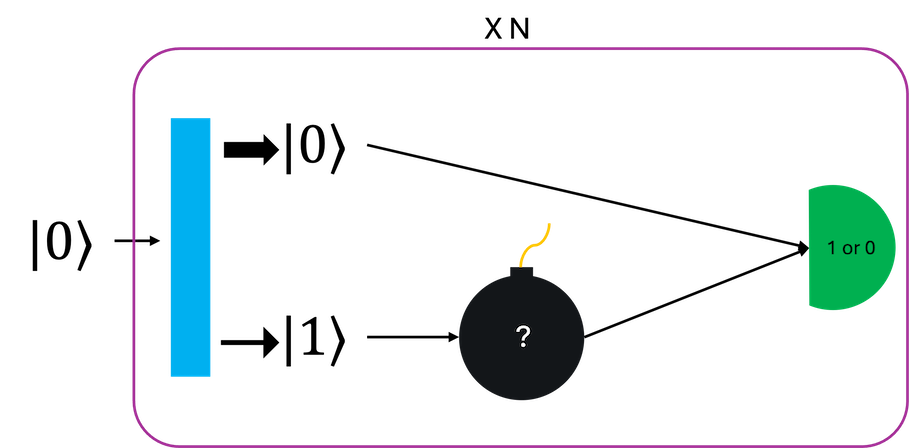

#### Case 1: No Bomb

If there's no bomb, there's nothing to measure or collapse the photon's state. The N small rotations simply add up.

Starting from the state $|0\rangle$, the final state after N rotations of $R_y(\theta)$ is:

$$|\psi_{final}\rangle = (R_y(\theta))^N |0\rangle = R_y(N\theta)|0\rangle$$

Since we set $\theta = \frac{\pi}{N}$, the total rotation angle $N\theta$ becomes $\pi$.

$$|\psi_{final}\rangle = R_y(\pi)|0\rangle = \cos(\frac{\pi}{2})|0\rangle + \sin(\frac{\pi}{2})|1\rangle = |1\rangle$$

A final measurement will therefore yield `1` with 100% probability, opposite to the general bomb experiment.

#### Case 2: With Bomb

1. First New Beam Splitter ($|\psi_1\rangle$): Instead of a full superposition, the first $R_y(\theta)$ gate creates a highly unbalanced one. The state after this first gentle rotation is:

$$|\psi_1\rangle = R_y(\theta)|0\rangle = \cos(\frac{\theta}{2})|0\rangle + \sin(\frac{\theta}{2})|1\rangle$$

2. The Bomb's Measurement (Repeated N times): The bomb's presence on the $|1\rangle$ path still acts as a measurement.

- Chance of Explosion: The probability of the bomb detonating in any single step is now extremely small:
    $P(\text{explosion}) = |\langle 1 | \psi_1 \rangle|^2 = \sin^2(\frac{\theta}{2})$.
    For a large N, this probability is tiny, approximately $(\frac{\pi}{2N})^2$, getting close to zero with large N.

- Chance of No Explosion: The probability of the photon taking the upper path ($|0\rangle$) and the bomb *not* exploding is $P(\text{no explosion}) = \cos^2(\frac{\theta}{2}) = \cos^2(\frac{\pi}{2N})$. With large N, this goes to `1`.

This cycle of (gentle rotation → measurement → collapse is repeated N times. Because the state is constantly being measured and collapsing back to $|0\rangle$ (with a high probability), it is effectively "frozen" and prevented from rotating towards the $|1\rangle$ state. The total probability of surviving all N steps without an explosion is $(\cos^2(\frac{\theta}{2}))^N$, which gets closer and closer to 1 as N increases.

3. Final State and Measurement: We now have two very different outcomes depending on whether the bomb was present.

The repeated measurements freeze the state. After N steps, the photon is still in the state $|0\rangle$ with very high probability. A final measurement will almost certainly yield `0`.


By running this procedure, if we measure `1` at the end, we know with 100% certainty that the bomb was **not** there. If we run it many times and always measure `0`, we can be almost certain the bomb **is** present, all while keeping the probability of detonation close to zero.


- [1] Misra, B., & Sudarshan, E. C. G. (1977). The Zeno's paradox in quantum theory. Journal of Mathematical Physics, 18(4), 756–763.
- [2] Aaronson, S. (n.d.). Lecture 4: The Elitzur-Vaidman Bomb and the Quantum Zeno Effect. Quantum Computing Since Democritus.


<div class="alert alert-block alert-success">
<b>Exercise 3: Building the Zeno Bomb Test Circuit ("The Watched Pot")</b>

In this exercise, we will focus on building the quantum circuit for the Zeno bomb test. This circuit will be the core component used in the next exercise to analyze the probability of explosion as a function of N.

**Your Goal**: Complete the Python function `watched_pot(N)` that takes an integer $N$ as a parameter. This function should return a quantum circuit that simulates $N$ "peeks" at the bomb. Each "peek" consists of a small $R_y(\theta)$ rotation followed immediately by a measurement. We will use $\theta= \frac{\pi}{N}$ for this exercise.

To complete, fill in the blank space in the `watched_pot` function below. Use a for loop to apply the `Ry(theta)` gate and the measure instruction $N$ times.
</div>

In [ ]:

def watched_pot(N=1):
    theta = # Your Code Here #

    qr = QuantumRegister(1)
    cr = ClassicalRegister(N, 'measure')

    qc = QuantumCircuit(qr, cr)

    for i in range(N):
        # Your Code Here #
        
    return qc

In [ ]:
my_qc = watched_pot(N=5)
my_qc.draw('mpl')

<div class="alert alert-block alert-success">
<b>Exercise 4: Analyzing the Zeno Effect's Effectiveness</b>

Now, using the `watched_pot` function from Exercise 3, we will not only run the simulation but also compare its results directly against the theoretical predictions. 

**Your Goal**:
Run simulations for various values of N (e.g., [1, 2, 3, 4, 5, 10, 20, 50]) and print both the simulated and theoretical probabilities for safe detection. You should observe that the simulated results closely match the theoretical values, and both show the probability of an explosion decreasing as $N$ gets larger.

To complete, use your watched_pot function from Exercise 3, then run the code to see the results. A "safe detection" is defined as the case where every single intermediate measurement results in 0.
</div>

In [ ]:

# Setup sampler and parameters for the simulation
num_shots = 10000
N_values = [1, 2, 3, 4, 5, 10, 20, 50]

circs = []
# Run the simulation for each value in the N_values list
for n in N_values:
    # Create the circuit using your function from Exercise 3
    circ = # Your Code Here
    circs.append(circ)
    
# Run the simulation
circs_tr = pm.run(circs)

job = sampler.run(circs_tr, shots=num_shots)
job_id = job.job_id())


In [ ]:
#run this after job finished

print("-------------------------------------------------------")
print(f"{'N':>3s} | {'P(Explosion Exp)':>16s} | {'P(Safe Exp)':>12s} | {'P(Safe Theory)':>15s}")
print("-------------------------------------------------------")


result = job.result()
#result = service.job(job_id).result()

for i in range(len(circs)):
    n = N_values[i]
    counts = result[i].data.measure.get_counts()
        
    # A "safe" outcome means all measurements were 0.
    safe_outcome_str = '0' * n
    safe_counts = counts.get(safe_outcome_str, 0)
        
    # --- Calculate probabilities from the simulation ---
    prob_safe_sim = # Your Code Here #
    prob_explosion_sim = 1 - prob_safe_sim
        
    # --- Calculate the THEORETICAL probability ---
    prob_safe_theory = (np.cos(np.pi / (2 * n))**2)**n
        
    print(f"{n:3d} | {prob_explosion_sim:16.4f} | {prob_safe_sim:12.4f} | {prob_safe_theory:15.4f}")


## Wrapping up

Congratulations! 🎉 🎉 🎉  You finished your quantum bomb and watched-pot effect experiments. 

Before you leave this lab, let's review what you've learned here and what's next.

### Critical concepts

- **Quantum Superposition**: Allows a qubit (quantum particle) to exist in multiple states (paths) simultaneously, enabling it to explore both paths in the bomb tester.
- **Quantum Interference**: The phenomenon where superimposed states combine to increase or decrease the probability of certain outcomes. In the absence of a bomb, destructive interference ensures only a specific measurement result (|0⟩) is obtained.
- **The Role of Measurement**: Measurement on a quantum system causes the superposition state to collapse. The bomb acts as a type of measurement, destroying the interference and creating a probability for a different measurement result (|1⟩).
- **Quantum Zeno Effect**: Frequent observation of a quantum system inhibits its evolution. In the bomb experiment, iterative measurements (the Quantum Zeno Effect), which generate a proper superposition state, reduce the probability of the particle collapsing onto the bomb path, increasing the chance of detection without explosion.
- **Effect of Iterative Measurement**: In the Quantum Zeno Effect, increasing the number of measurements (N) reduces the rotation angle between each measurement. This effectively "freezes" the quantum state, preventing it from evolving significantly towards interaction with the bomb, thereby lowering the explosion probability while increasing the detection probability.


### Challenge Questions

- Explore Alternative Quantum Circuit Designs

Consider designing an experiment with various combinations of quantum gates (beyond the basic setup) to investigate how they impact the bomb tester or Zeno effect implementation and outcomes.


- Optimize Bomb Tester Efficiency

Seek methods to enhance the bomb detection probability beyond 25% without relying on an infinite number of measurements, potentially by exploring different quantum state preparations or measurement strategies.


- Study Quantum Zeno Effect Applications

Research how the Quantum Zeno Effect is applied in other quantum technologies, such as quantum computing (e.g., error prevention), quantum state control, or quantum communication.


- Investigate the Quantum Anti-Zeno Effect

Learn about the opposite phenomenon where frequent observation accelerates state change and consider its implications or potential use cases.

- And more!

Consider expanding your learning by participating in the BasQ hackathon prompts - creating a quantum game using these principles! 